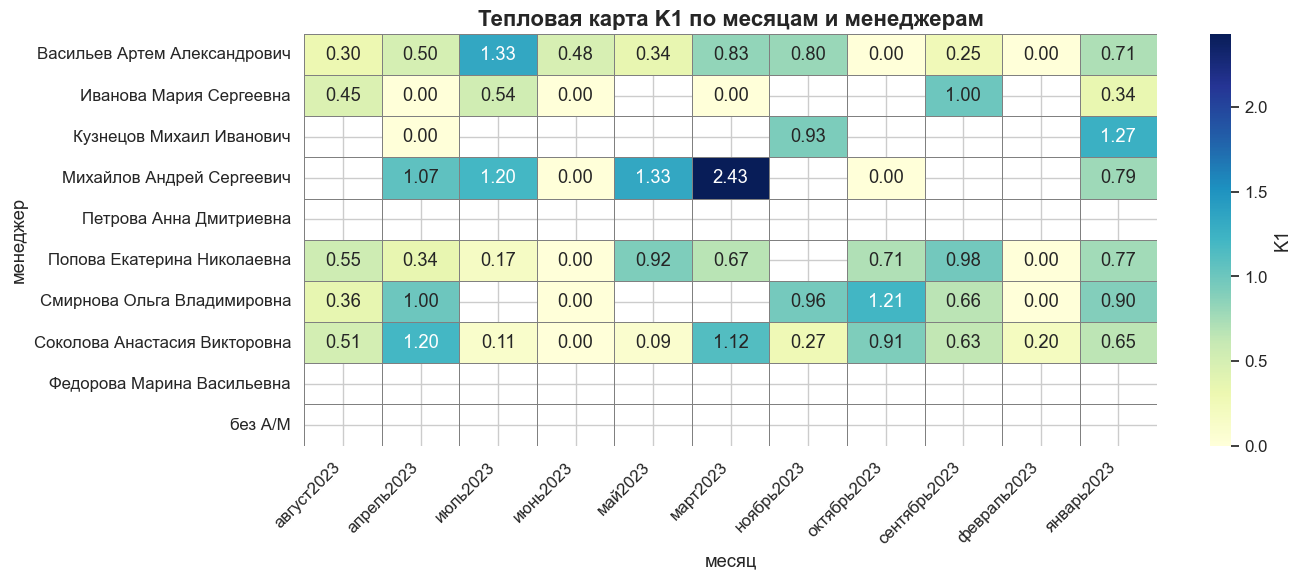

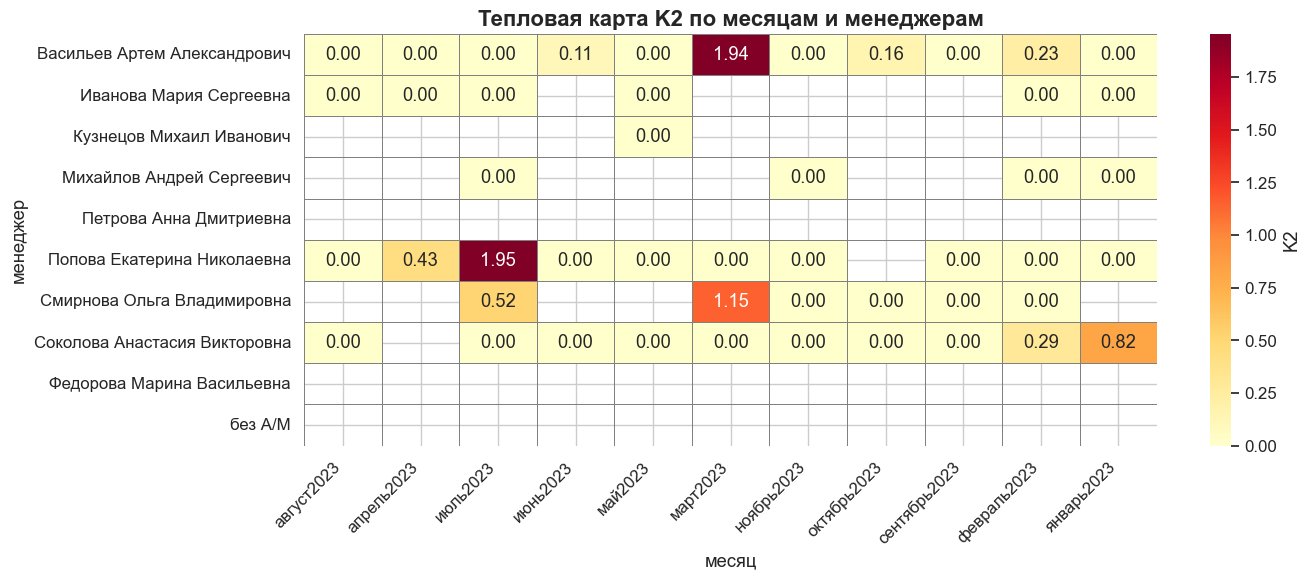

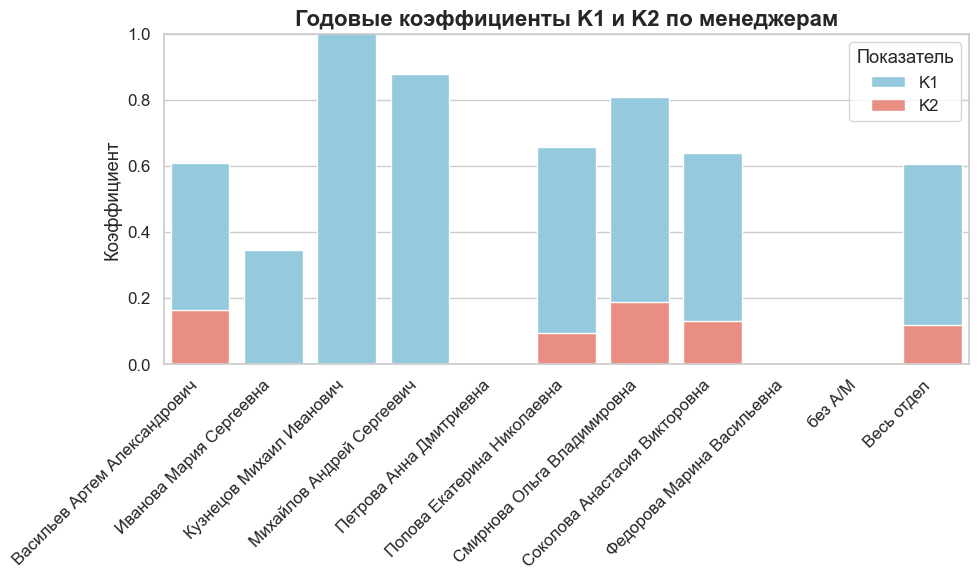

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Настройка стиля
sns.set_theme(style="whitegrid", font_scale=1.1)

df = pd.read_excel("Report.xlsx")

# Приведём названия колонок к единому виду
df.columns = df.columns.str.strip().str.lower()

# Убираем годовые строки (чтобы не мешали динамике тепловых карт)
df_dyn = df[~df['месяц'].str.lower().isin(["год", "за весь год"])]

# ==========================
# 1. Тепловая карта K1
# ==========================
pivot_k1 = df_dyn.pivot(index="менеджер", columns="месяц", values="k1")
plt.figure(figsize=(14, 6))
sns.heatmap(
    pivot_k1, 
    annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5, linecolor='gray',
    cbar_kws={'label': 'K1'}
)
plt.title("Тепловая карта K1 по месяцам и менеджерам", fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# ==========================
# 2. Тепловая карта K2
# ==========================
pivot_k2 = df_dyn.pivot(index="менеджер", columns="месяц", values="k2")
plt.figure(figsize=(14, 6))
sns.heatmap(
    pivot_k2, 
    annot=True, fmt=".2f", cmap="YlOrRd", linewidths=0.5, linecolor='gray',
    cbar_kws={'label': 'K2'}
)
plt.title("Тепловая карта K2 по месяцам и менеджерам", fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# ==========================
# 3. Столбчатая диаграмма годовых коэффициентов
# ==========================
df_year = df[df['месяц'].str.lower().isin(["год", "за весь год"])]

plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(
    data=df_year, x="менеджер", y="k1", color="skyblue", label="K1"
)
sns.barplot(
    data=df_year, x="менеджер", y="k2", color="salmon", label="K2"
)

plt.ylabel("Коэффициент")
plt.xlabel("")
plt.title("Годовые коэффициенты K1 и K2 по менеджерам", fontsize=16, fontweight='bold')
plt.legend(title="Показатель")
plt.ylim(0, 1)  # так как коэффициенты от 0 до 1
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
